# Titanic / Decision Tree

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [54]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]
label = "Survived"

In [57]:
df[features].head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


## One-Hot Encoder

In [58]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# encoder.fit(df[["Embarked"]])
encoded = encoder.fit_transform(df[["Sex", "Embarked"]])
encoded_features = encoder.get_feature_names_out()
df_encoded = pd.DataFrame(data=encoded, columns=encoded_features)
df = pd.merge(df, df_encoded, left_index=True, right_index=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,0.0,0.0,1.0,0.0


In [59]:
features.extend(list(encoded_features))
features.remove("Sex")
features.remove("Embarked")
features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_nan']

## Train / Test Split

In [60]:
X = df[features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((712, 10), (179, 10))

## Training

In [87]:
model = DecisionTreeClassifier(max_depth=3)
clf = model.fit(X_train, y_train)
clf

DecisionTreeClassifier(max_depth=3)

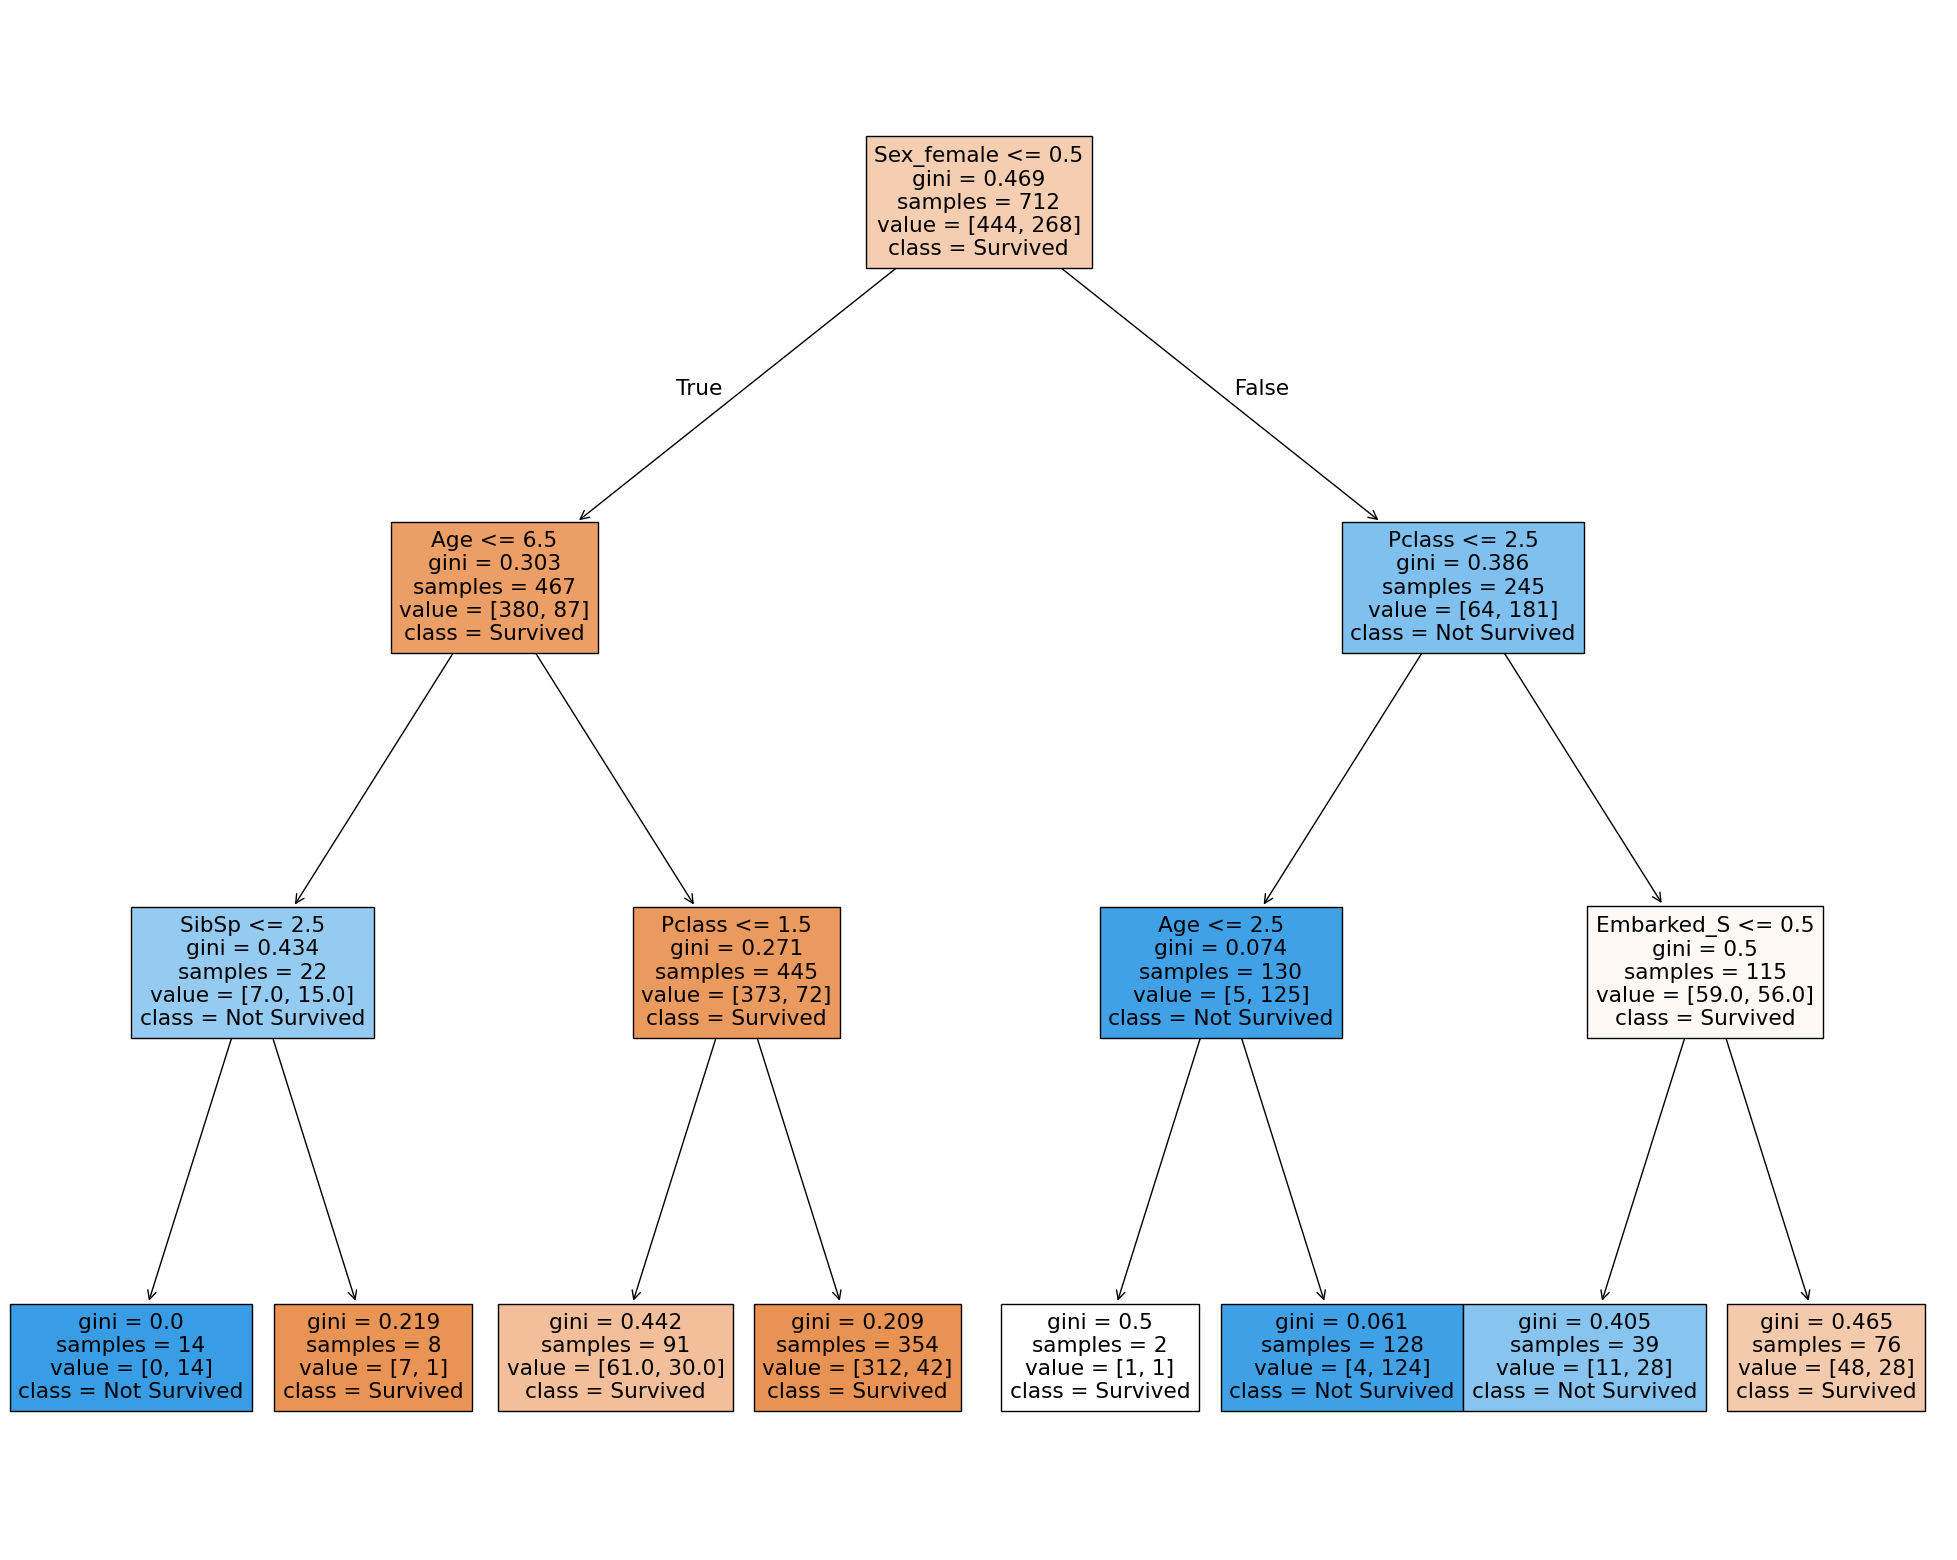

In [88]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, 
                   feature_names=features,  
                   class_names=["Survived", "Not Survived"],
                   filled=True)

In [79]:
fig.savefig("decistion_tree.png")

## Evaluation

In [82]:
model.score(X_test, y_test)

0.776536312849162

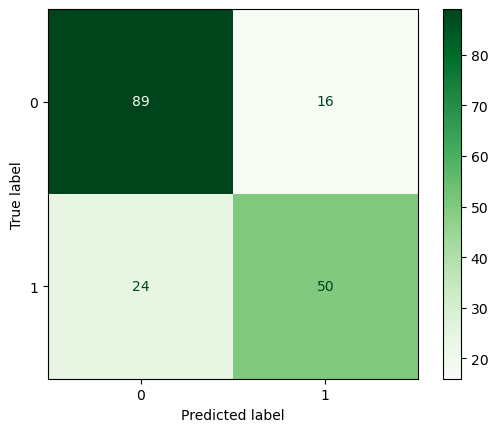

In [85]:
predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap="Greens")
plt.show()

In [86]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

0.7142857142857143

## Feature Importance

In [89]:
feature_importances = clf.feature_importances_
feature_importances

array([0.2143271 , 0.07707555, 0.04923542, 0.        , 0.61958698,
       0.        , 0.        , 0.        , 0.03977495, 0.        ])

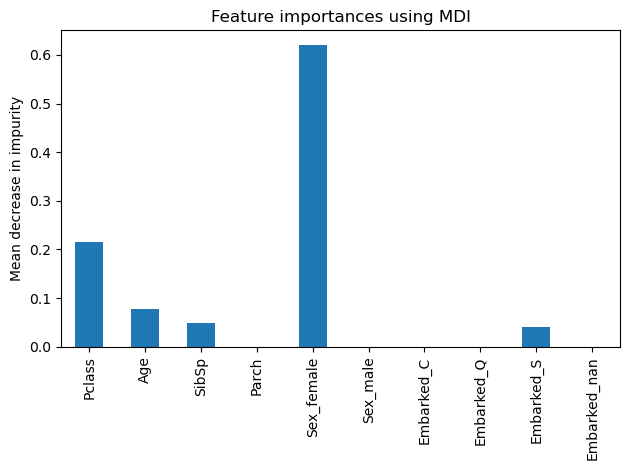

In [93]:
series = pd.Series(feature_importances, index=features)

fig, ax = plt.subplots()
series.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()